# Are all planetary systems similar?

In this research paper, I explore the nature of planetary systems outside of our solar system. By accessing the data from NASA's exoplanet archive, specifically the Planetary Systems Composite Data table, I was able to create planetary systems grouped by the same star, categorize exoplanets and statistically analyze these systems.

## Setup

In [9]:
%matplotlib inline

# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

In [24]:
# CONFIGURATION
# -------------
sns.set_theme(style='white') # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
clr = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
clrs = sns.set_palette(sns.color_palette(clr))

# configuring fonts for plotting
font = FontProperties()
font.set_family('serif')
font.set_name('Andale Mono')
font.set_style('normal')

%matplotlib inline 

## Data

The data has been previously downloaded from the NASA exoplanet archive and stored locally in `exoplanets.csv`.

In [11]:
exo_data = pd.read_csv('../DATA/exoplanets.csv')

In [12]:
# checking the table
print(exo_data.shape)
exo_data.head()

(4940, 14)


,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.6000,19.10,0.231,4742.0,2.70,-0.35,93.1846
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.8142,13.80,0.080,4213.0,2.78,-0.02,125.3210
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.5000,3.90,0.000,4813.0,2.20,-0.24,75.4392
3,14 Her b,14 Her,1,2,1773.40002,2.93,12.9,1481.0878,3.79,0.370,5338.0,0.90,0.41,17.9323
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.7374,1.26,0.680,5750.0,1.08,0.06,21.1397


# Statistical analysis

In [13]:
def annotate_countplot(sp, df: pd.DataFrame(), perc_height:float, font_size:int=10):
    for p in sp.patches:
        height = p.get_height()
    
        sp.text(p.get_x() + p.get_width()/2., 
                height + len(df) * perc_height, height,
                ha = 'center', fontsize = font_size)

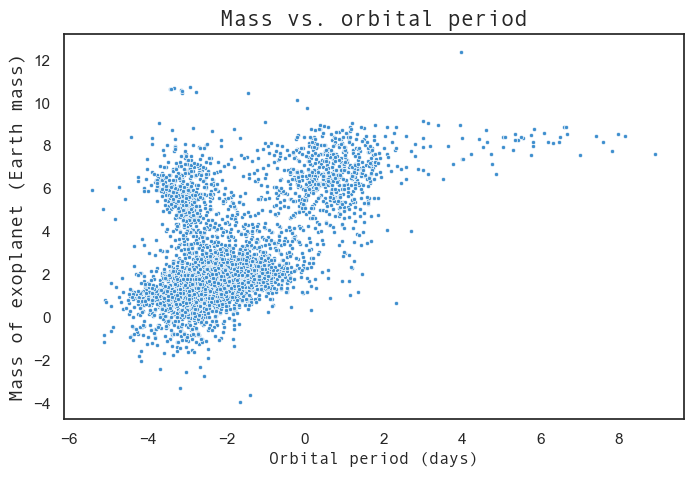

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_bmasse']), marker='.', color=b2)
plt.title('Mass vs. orbital period', fontproperties=font, fontsize=16)
plt.xlabel('Orbital period (days)',fontproperties=font, fontsize=12)
plt.ylabel('Mass of exoplanet (Earth mass)',fontproperties=font, fontsize=14)
plt.savefig('../img/mass_orb_period.png', dpi=300)
plt.show()

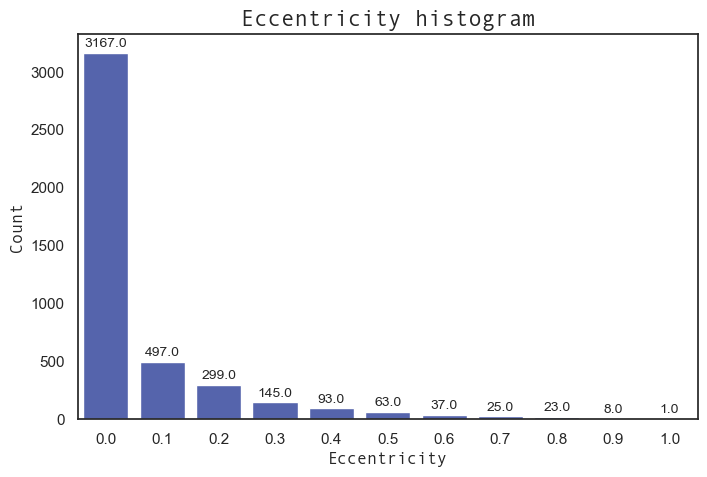

In [28]:
plt.figure(figsize=(8,5))
scp = sns.countplot(x=round(exo_data['pl_orbeccen'],1),color=b1,data = exo_data)
annotate_countplot(scp,exo_data,0.01)
plt.xlabel('Eccentricity', fontproperties=font, fontsize=12)
plt.ylabel('Count', fontproperties=font, fontsize=12)
plt.title('Eccentricity histogram', fontproperties=font, fontsize=16)
plt.savefig('../img/ecc_hist.png', dpi=300)
plt.show()

---

In [29]:
ht = exo_data[exo_data['pl_orbper']<1000].copy()
ht.head()

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist
0,11 Com b,11 Com,2,1,326.03000,1.29,12.1,6165.60000,19.10,0.231,4742.0,2.70,-0.35,93.1846
1,11 UMi b,11 UMi,1,1,516.21997,1.53,12.3,4684.81420,13.80,0.080,4213.0,2.78,-0.02,125.3210
2,14 And b,14 And,1,1,185.84000,0.83,12.9,1525.50000,3.90,0.000,4813.0,2.20,-0.24,75.4392
4,16 Cyg B b,16 Cyg B,3,1,798.50000,1.66,13.5,565.73740,1.26,0.680,5750.0,1.08,0.06,21.1397
5,17 Sco b,17 Sco,1,1,578.38000,1.45,12.9,1373.01872,3.51,0.060,4157.0,1.22,-0.01,124.9530


In [30]:
ht['a'] = ht['pl_orbsmax']**3
ht['P']= ((ht['pl_orbper']/365)**2) * ht['st_mass']
ht[ht['P']>25]

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,st_teff,st_mass,st_met,sy_dist,a,P
829,HD 240237 b,HD 240237,1,1,745.70001,1.92,12.2,5050.3187,15.3,0.4,3926.0,8.76,-0.25,933.377,7.077888,36.563409
1058,HD 96127 b,HD 96127,1,1,647.29999,1.42,12.1,6661.7168,20.7,0.3,3943.0,10.94,-0.24,587.659,2.863288,34.406682


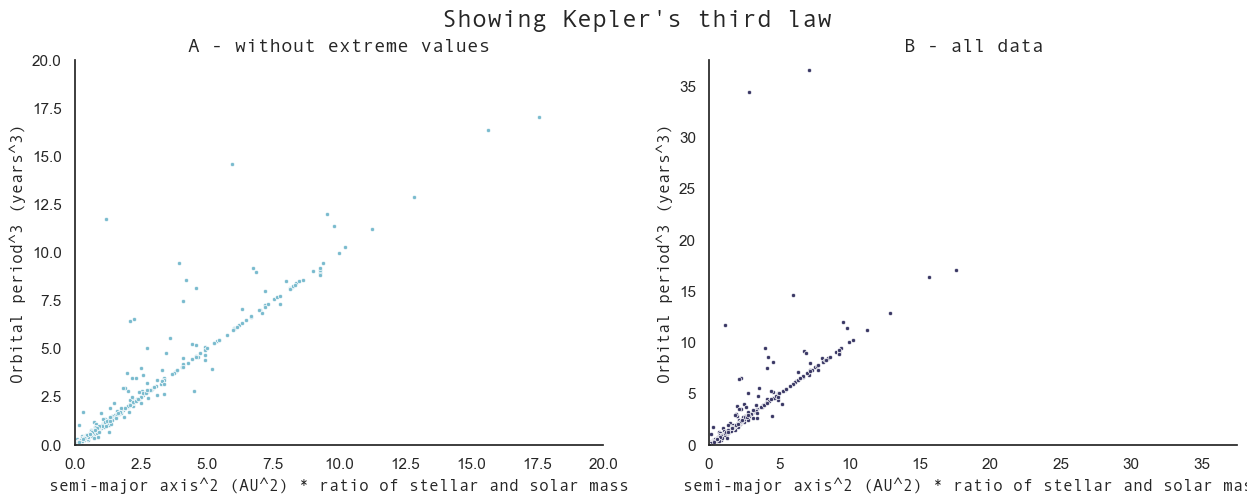

In [36]:
_,_ = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Showing Kepler's third law", fontproperties=font, fontsize=18)
a = ht['pl_orbsmax']**3
P = ((ht['pl_orbper']/365)**2) * ht['st_mass']
plt.subplot(1,2,1)
sns.scatterplot(x=a, y=P, color=b3, marker='.')
sns.despine()
plt.xlim(0,20)
plt.ylim(0,20)
plt.title('A - without extreme values', fontproperties=font, fontsize=14)
plt.xlabel('semi-major axis^2 (AU^2) * ratio of stellar and solar mass', fontproperties=font, fontsize=12)
plt.ylabel('Orbital period^3 (years^3)', fontproperties=font, fontsize=12)

plt.subplot(1,2,2)
sns.scatterplot(x=a, y=P, color=b4, marker='.')
sns.despine()
plt.title('B - all data', fontproperties=font, fontsize=14)
plt.xlim(0,(np.max(P)+1))
plt.ylim(0,(np.max(P)+1))
plt.xlabel('semi-major axis^2 (AU^2) * ratio of stellar and solar mass', fontproperties=font, fontsize=12)
plt.ylabel('Orbital period^3 (years^3)', fontproperties=font, fontsize=12)

plt.savefig('../img/keplers_3rd.png', dpi=300)

plt.show()

---

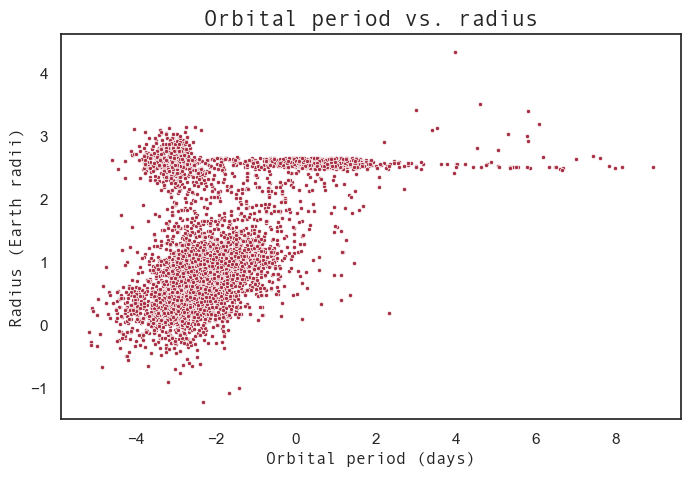

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbsmax']),y=np.log(exo_data['pl_rade']), marker='.', color=or1)
plt.title('Orbital period vs. radius', fontproperties=font, fontsize=16)
plt.xlabel('Orbital period (days)',fontproperties=font, fontsize=12)
plt.ylabel('Radius (Earth radii)', fontproperties=font, fontsize=12)
plt.savefig('../img/t_vs_r.png', dpi=300)
plt.show()

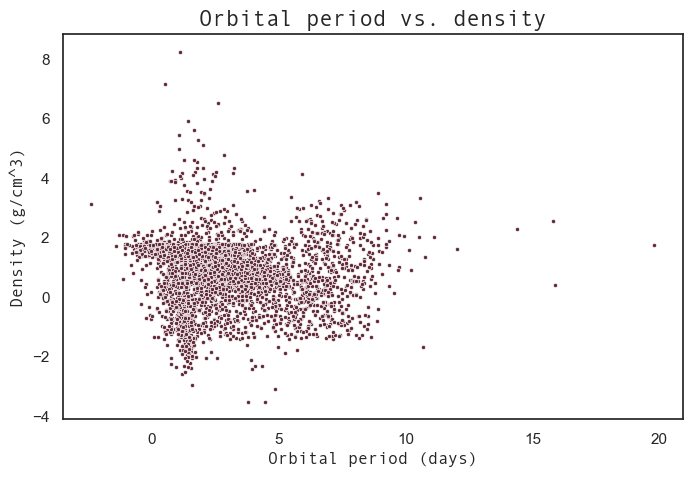

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log(exo_data['pl_orbper']),y=np.log(exo_data['pl_dens']), marker='.', color=or2)
plt.title('Orbital period vs. density', fontproperties=font, fontsize=16)
plt.xlabel('Orbital period (days)',fontproperties=font, fontsize=12)
plt.ylabel('Density (g/cm^3)', fontproperties=font, fontsize=12)
plt.savefig('../img/t_vs_density.png', dpi=300)
plt.show()

# Next...

In the following notebook, we will categorize our exoplanets into specific types, such as Hot Jupiters, Super Earths, and more!